In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE


In [2]:
data=pd.read_csv("ecommerce.csv")
data

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33308,2023-08-10 13:39:06,Clothing,279,2,2187,PayPal,55,1.0,Michelle Flores,55,Male,1
249996,48835,2021-11-23 01:30:42,Home,27,1,3615,Credit Card,42,1.0,Jeremy Rush,42,Female,1
249997,21019,2020-07-02 14:04:48,Home,17,5,2466,Cash,41,0.0,Tina Craig,41,Male,0
249998,49234,2020-12-30 02:02:40,Books,398,2,3668,Crypto,34,0.0,Jennifer Cooper,34,Female,1


In [3]:
data.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


In [4]:
data.tail()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
249995,33308,2023-08-10 13:39:06,Clothing,279,2,2187,PayPal,55,1.0,Michelle Flores,55,Male,1
249996,48835,2021-11-23 01:30:42,Home,27,1,3615,Credit Card,42,1.0,Jeremy Rush,42,Female,1
249997,21019,2020-07-02 14:04:48,Home,17,5,2466,Cash,41,0.0,Tina Craig,41,Male,0
249998,49234,2020-12-30 02:02:40,Books,398,2,3668,Crypto,34,0.0,Jennifer Cooper,34,Female,1
249999,16971,2021-03-13 16:28:35,Electronics,425,4,2370,Cash,36,1.0,Justin Lawson,36,Female,1


In [5]:
data.describe()

,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn
count,250000.00000,250000.000000,250000.000000,250000.000000,250000.000000,202404.000000,250000.000000,250000.000000
mean,25004.03624,254.659512,2.998896,2725.370732,43.940528,0.497861,43.940528,0.199496
std,14428.27959,141.568577,1.414694,1442.933565,15.350246,0.499997,15.350246,0.399622
min,1.00000,10.000000,1.000000,100.000000,18.000000,0.000000,18.000000,0.000000
25%,12497.75000,132.000000,2.000000,1477.000000,31.000000,0.000000,31.000000,0.000000
50%,25018.00000,255.000000,3.000000,2724.000000,44.000000,0.000000,44.000000,0.000000
75%,37506.00000,377.000000,4.000000,3974.000000,57.000000,1.000000,57.000000,0.000000
max,50000.00000,500.000000,5.000000,5350.000000,70.000000,1.000000,70.000000,1.000000


In [6]:
data.shape

(250000, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [8]:
data.isnull()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,False,False,False,False,False,False,False,False,False,False,False,False,False
249996,False,False,False,False,False,False,False,False,False,False,False,False,False
249997,False,False,False,False,False,False,False,False,False,False,False,False,False
249998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
empty_cell=data.isnull().sum()
print(empty_cell)

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47596
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64


In [10]:
data['Purchase Date'] = pd.to_datetime(data['Purchase Date'], errors='coerce')
data['Purchase Date']

0        2020-09-08 09:38:32
1        2022-03-05 12:56:35
2        2022-05-23 18:18:01
3        2020-11-12 13:13:29
4        2020-11-27 17:55:11
                 ...        
249995   2023-08-10 13:39:06
249996   2021-11-23 01:30:42
249997   2020-07-02 14:04:48
249998   2020-12-30 02:02:40
249999   2021-03-13 16:28:35
Name: Purchase Date, Length: 250000, dtype: datetime64[ns]

In [11]:
data['Date'] = data['Purchase Date'].dt.date
data['Date']

0         2020-09-08
1         2022-03-05
2         2022-05-23
3         2020-11-12
4         2020-11-27
             ...    
249995    2023-08-10
249996    2021-11-23
249997    2020-07-02
249998    2020-12-30
249999    2021-03-13
Name: Date, Length: 250000, dtype: object

In [12]:
data['Time'] = data['Purchase Date'].dt.time
data['Time']

0         09:38:32
1         12:56:35
2         18:18:01
3         13:13:29
4         17:55:11
            ...   
249995    13:39:06
249996    01:30:42
249997    14:04:48
249998    02:02:40
249999    16:28:35
Name: Time, Length: 250000, dtype: object

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            250000 non-null  int64         
 1   Purchase Date          250000 non-null  datetime64[ns]
 2   Product Category       250000 non-null  object        
 3   Product Price          250000 non-null  int64         
 4   Quantity               250000 non-null  int64         
 5   Total Purchase Amount  250000 non-null  int64         
 6   Payment Method         250000 non-null  object        
 7   Customer Age           250000 non-null  int64         
 8   Returns                202404 non-null  float64       
 9   Customer Name          250000 non-null  object        
 10  Age                    250000 non-null  int64         
 11  Gender                 250000 non-null  object        
 12  Churn                  250000 non-null  int6

In [14]:
data.drop(columns=['Purchase Date'], inplace=True)

In [15]:
data.drop(columns=['Time'], inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Product Category       250000 non-null  object 
 2   Product Price          250000 non-null  int64  
 3   Quantity               250000 non-null  int64  
 4   Total Purchase Amount  250000 non-null  int64  
 5   Payment Method         250000 non-null  object 
 6   Customer Age           250000 non-null  int64  
 7   Returns                202404 non-null  float64
 8   Customer Name          250000 non-null  object 
 9   Age                    250000 non-null  int64  
 10  Gender                 250000 non-null  object 
 11  Churn                  250000 non-null  int64  
 12  Date                   250000 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [17]:
empty_cell=data.isnull().sum()
print(empty_cell)

Customer ID                  0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47596
Customer Name                0
Age                          0
Gender                       0
Churn                        0
Date                         0
dtype: int64


In [18]:
data = data.iloc[:-100000].reset_index(drop=True)


In [19]:
data.shape

(150000, 13)

In [20]:
data.tail()

,Customer ID,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn,Date
149995,22598,Home,253,4,3646,Credit Card,22,0.0,Sandra Robinson MD,22,Male,0,2021-04-08
149996,22598,Clothing,225,5,1368,Credit Card,22,0.0,Sandra Robinson MD,22,Male,0,2023-07-17
149997,22598,Clothing,464,5,1437,Cash,22,NaN,Sandra Robinson MD,22,Male,0,2022-09-16
149998,22598,Books,421,3,1472,PayPal,22,1.0,Sandra Robinson MD,22,Male,0,2022-01-12
149999,22598,Home,342,4,381,Cash,22,1.0,Sandra Robinson MD,22,Male,0,2020-06-25


In [21]:
empty_cell=data.isnull().sum()
print(empty_cell)

Customer ID                  0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  28689
Customer Name                0
Age                          0
Gender                       0
Churn                        0
Date                         0
dtype: int64


In [22]:
data.shape

(150000, 13)

In [23]:
data = data.dropna()
data

,Customer ID,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn,Date
0,46251,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0,2020-09-08
1,46251,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0,2022-03-05
2,46251,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0,2022-05-23
3,46251,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0,2020-11-12
4,13593,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1,2020-11-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149994,39344,Clothing,323,2,4104,PayPal,32,0.0,Pamela Martin,32,Male,0,2021-03-20
149995,22598,Home,253,4,3646,Credit Card,22,0.0,Sandra Robinson MD,22,Male,0,2021-04-08
149996,22598,Clothing,225,5,1368,Credit Card,22,0.0,Sandra Robinson MD,22,Male,0,2023-07-17
149998,22598,Books,421,3,1472,PayPal,22,1.0,Sandra Robinson MD,22,Male,0,2022-01-12


In [24]:
empty_cell=data.isnull().sum()
print(empty_cell)

Customer ID              0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
Payment Method           0
Customer Age             0
Returns                  0
Customer Name            0
Age                      0
Gender                   0
Churn                    0
Date                     0
dtype: int64


In [25]:
# Create binary target column
data['Returned'] = (data['Returns'] > 0).astype(int)

In [26]:
data = data.drop(columns=['Customer ID', 'Customer Name', 'Date', 'Returns', 'Churn'])

In [27]:
data = pd.get_dummies(data, columns=['Product Category', 'Payment Method', 'Gender'], drop_first=True)


In [28]:
X = data.drop(columns=['Returned'])
y = data['Returned']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [31]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [32]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.49750649136545355


In [33]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.51      0.51     12142
           1       0.50      0.48      0.49     12121

    accuracy                           0.50     24263
   macro avg       0.50      0.50      0.50     24263
weighted avg       0.50      0.50      0.50     24263



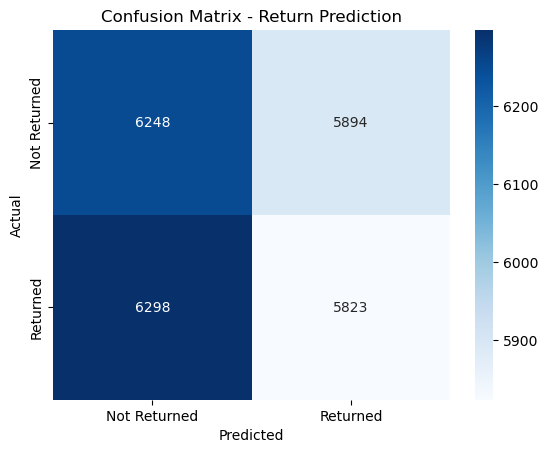

In [34]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Returned', 'Returned'], yticklabels=['Not Returned', 'Returned'])
plt.title("Confusion Matrix - Return Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [35]:
from imblearn.over_sampling import SMOTE

In [36]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [37]:
model = LogisticRegression(max_iter=1000)
model.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=1000)

In [38]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 1, 1])

In [39]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5038123892346371
              precision    recall  f1-score   support

           0       0.50      0.60      0.55     12142
           1       0.50      0.41      0.45     12121

    accuracy                           0.50     24263
   macro avg       0.50      0.50      0.50     24263
weighted avg       0.50      0.50      0.50     24263



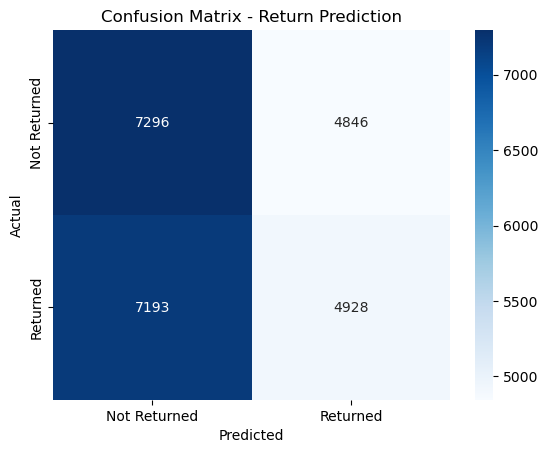

In [40]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Returned', 'Returned'], yticklabels=['Not Returned', 'Returned'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Return Prediction")
plt.show()

In [41]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [42]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [43]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.49536331039030623
              precision    recall  f1-score   support

           0       0.50      0.51      0.50     12142
           1       0.49      0.48      0.49     12121

    accuracy                           0.50     24263
   macro avg       0.50      0.50      0.50     24263
weighted avg       0.50      0.50      0.50     24263



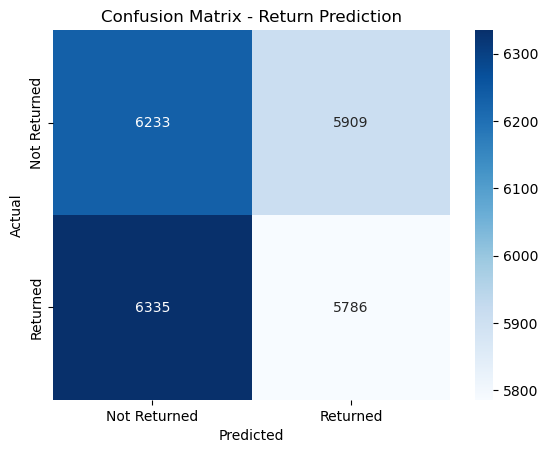

In [44]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Returned', 'Returned'], yticklabels=['Not Returned', 'Returned'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Return Prediction")
plt.show()

In [45]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [46]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [47]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [48]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.49359106458393437
              precision    recall  f1-score   support

           0       0.49      0.51      0.50     12142
           1       0.49      0.48      0.49     12121

    accuracy                           0.49     24263
   macro avg       0.49      0.49      0.49     24263
weighted avg       0.49      0.49      0.49     24263



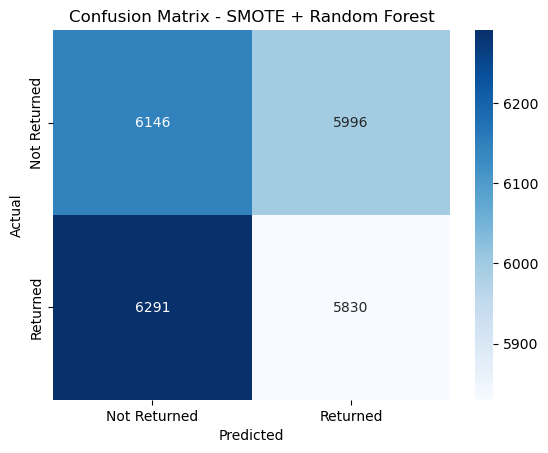

In [49]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Returned', 'Returned'], yticklabels=['Not Returned', 'Returned'])
plt.title("Confusion Matrix - SMOTE + Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

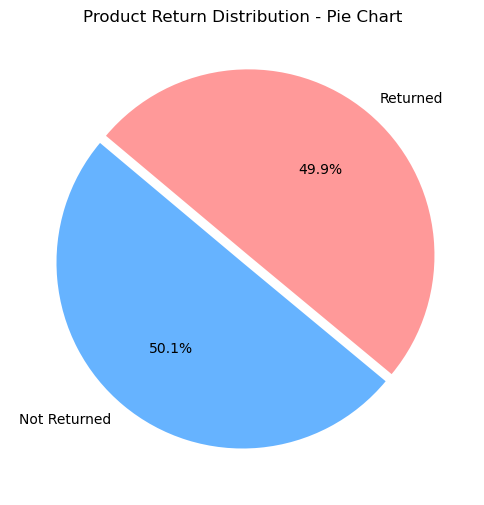

In [54]:
return_counts = data['Returned'].value_counts().sort_index()
labels = ['Not Returned', 'Returned']
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6, 7))
plt.pie(return_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=(0, 0.05))
plt.title("Product Return Distribution - Pie Chart")
plt.show()


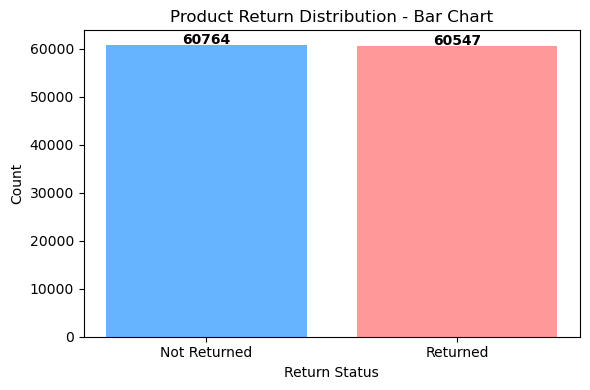

In [55]:
plt.figure(figsize=(6, 4))
plt.bar(labels, return_counts, color=colors)
plt.title("Product Return Distribution - Bar Chart")
plt.xlabel("Return Status")
plt.ylabel("Count")
for i, count in enumerate(return_counts):
    plt.text(i, count + 100, str(count), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

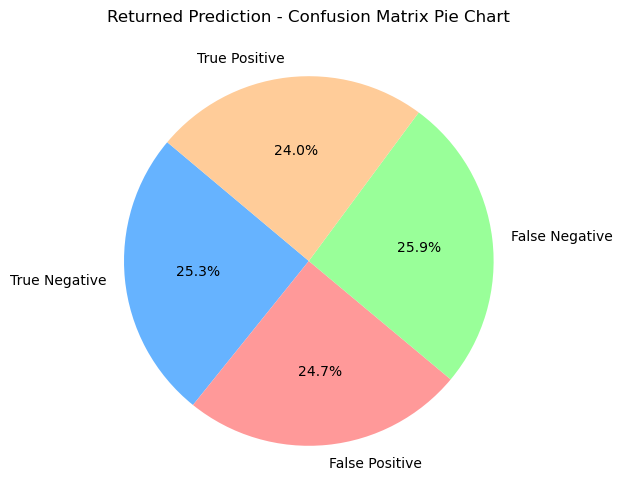

In [57]:
cm = confusion_matrix(y_test, y_pred)
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
values = [cm[0][0], cm[0][1], cm[1][0], cm[1][1]]
colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99']


plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Returned Prediction - Confusion Matrix Pie Chart')
plt.show()

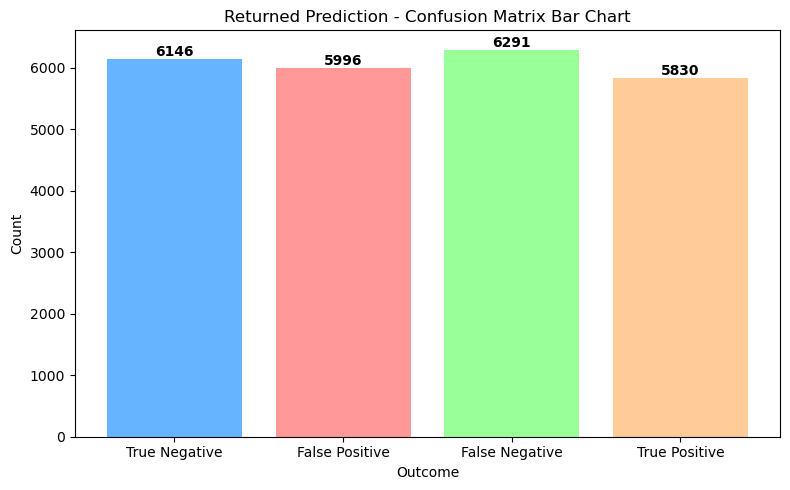

In [58]:
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=colors)
plt.title('Returned Prediction - Confusion Matrix Bar Chart')
plt.xlabel('Outcome')
plt.ylabel('Count')
for i, v in enumerate(values):
    plt.text(i, v + 50, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

In [60]:
corr_matrix = data.corr()

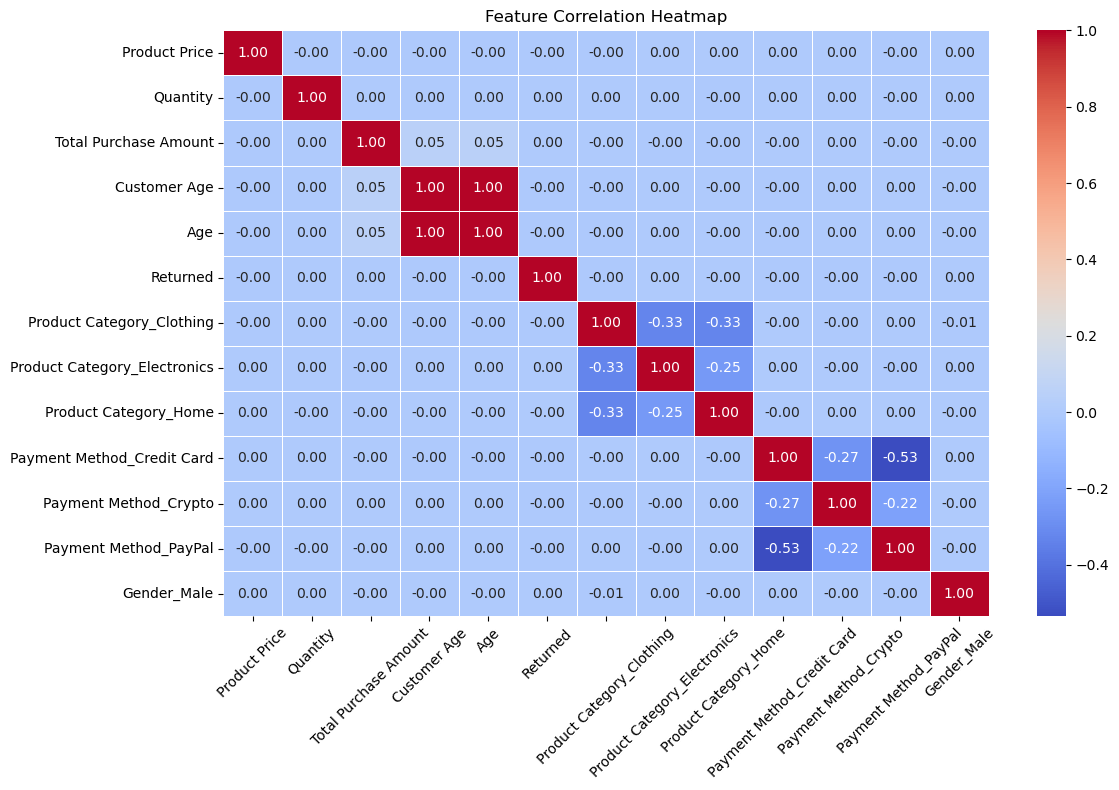

In [61]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()